In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix

In [6]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
x_train, x_text = x_train/255.0, x_test/255.0

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/home/franz/Documents/Lab/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1754384988.039299   10030 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1754384988.046168   10030 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train,y_train, epochs = 10, validation_data = (x_test,y_test))

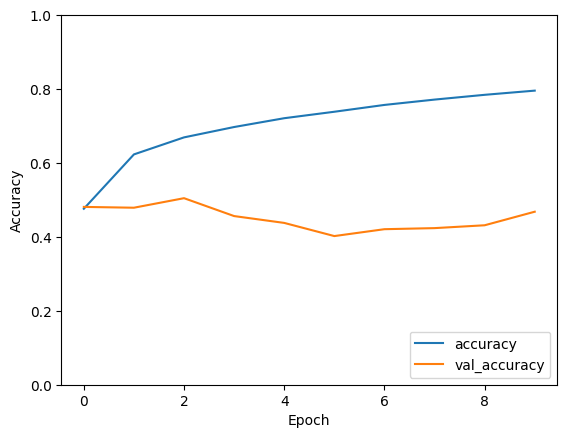

In [9]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [10]:
print("Evaluate on test data"  )
confusion_matrix(y_test, model.predict(x_test).argmax(axis=1 ))

Evaluate on test data
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[661,  17,  13,  93,  11,   7,   3,  54, 106,  35],
       [131, 587,   2,  31,   1,   2,   1,  11, 151,  83],
       [155,  32, 175, 229,  14, 137,  18, 110,  93,  37],
       [113,  25,  11, 428,   6, 153,  17,  85, 108,  54],
       [108,  31,  40, 200, 120, 123,  12, 252,  81,  33],
       [ 43,  16,  10, 232,   5, 481,  11,  94,  74,  34],
       [ 75,  75,  21, 192,  13, 122, 213,  63, 148,  78],
       [ 62,  19,   3,  40,   6,  76,   2, 690,  53,  49],
       [184,  13,   2,  47,  13,   2,   1,  30, 663,  45],
       [102,  83,   3,  23,   2,   7,   4,  32,  81, 663]])